In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

1. Perform exploratory data analysis (EDA)

In [ ]:
df=pd.read_csv("/content/ToyotaCorolla - MLR.csv")

In [ ]:
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [ ]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [ ]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [ ]:
df.isna().sum()

,0
Price,0
Age_08_04,0
KM,0
Fuel_Type,0
HP,0
Automatic,0
cc,0
Doors,0
Cylinders,0
Gears,0


In [ ]:
df.duplicated().sum()

np.int64(1)

In [ ]:
df.drop_duplicates(inplace=True,ignore_index=True)

<Axes: >

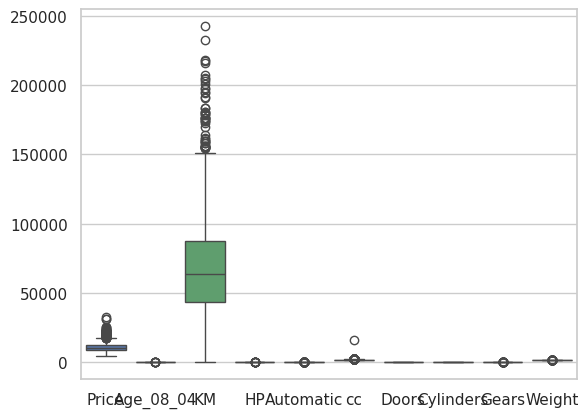

In [ ]:
# Box plots
sns.boxplot(df)

In [ ]:
# Outlier Capping
def outlier_capping(df,column):
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    lower_extream=q1-1.5*iqr
    upper_extream=q3+1.5*iqr
    df[column]=df[column].apply(lambda x : lower_extream if x<lower_extream else upper_extream if x>upper_extream else x)
for col in df.select_dtypes(["int","float"]).columns:
    outlier_capping(df,col)

<Axes: >

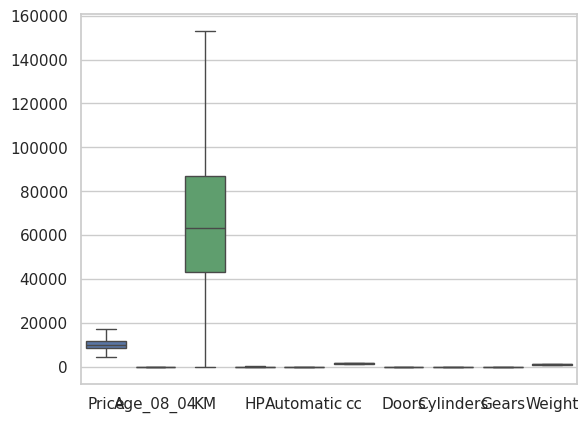

In [ ]:
sns.boxplot(df)

In [ ]:
numeric_cols = ['Price', 'Age_08_04', 'KM', 'HP', 'Automatic',
                'cc', 'Doors', 'Cylinders', 'Gears', 'Weight']

In [ ]:
sns.set(style="whitegrid")

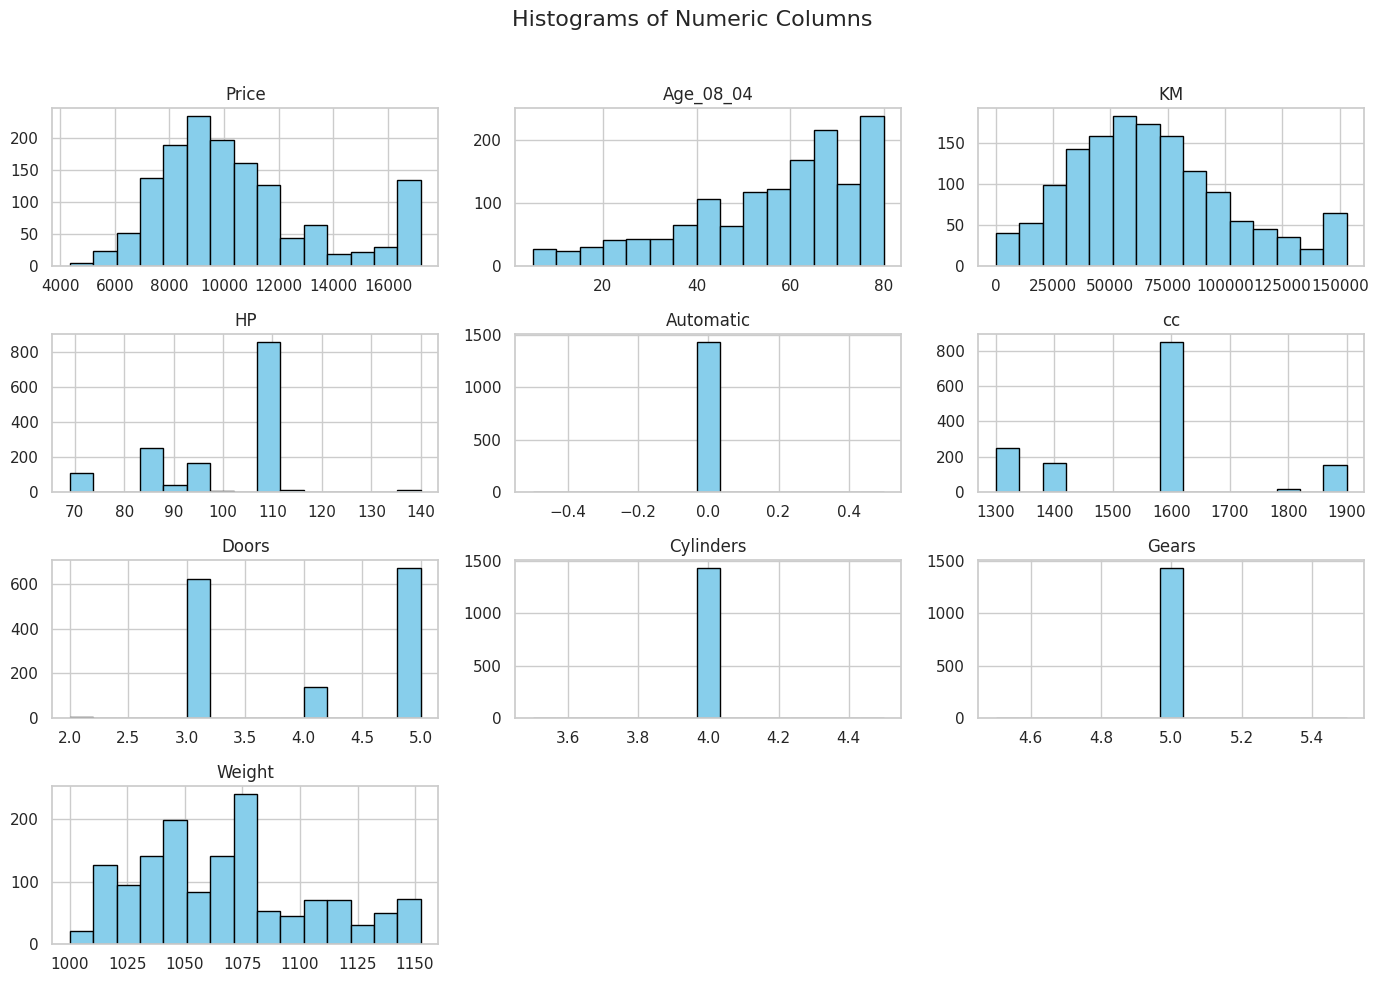

In [ ]:
df[numeric_cols].hist(figsize=(14, 10), bins=15, color='skyblue', edgecolor='black')

# Adjust layout and show
plt.suptitle("Histograms of Numeric Columns", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
df1 = df.select_dtypes(exclude="object")

In [ ]:
df1.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight'],
      dtype='object')

In [ ]:
target= df['Price']
features= df.drop(columns='Price')

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label=LabelEncoder() #encoding the categorical values using label encoders

In [ ]:
cat_col =[col for col in features.columns if features[col].dtypes=='O']

In [ ]:
features['Fuel_Type']=label.fit_transform(features[['Fuel_Type']])

In [ ]:
features['Fuel_Type']

,Fuel_Type
0,1
1,1
2,1
3,1
4,1
...,...
1430,2
1431,2
1432,2
1433,2


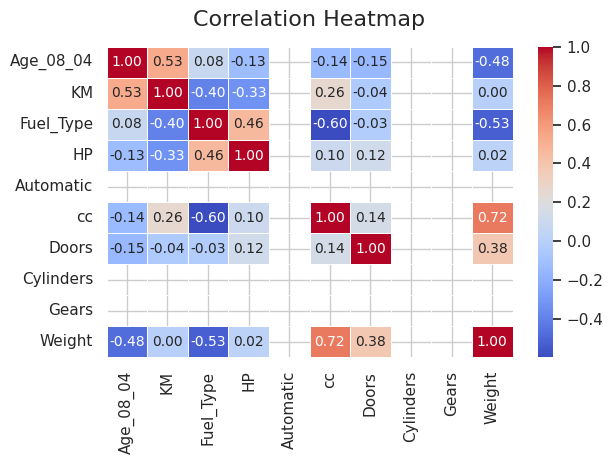

In [ ]:
corrr=features.corr()
# Create heatmap
sns.heatmap(corrr, annot=True, cmap='coolwarm', fmt=".2f",
            linewidths=0.5, annot_kws={"size":10})

# Add title and adjust layout
plt.title("Correlation Heatmap", fontsize=16, pad=15)
plt.tight_layout()
plt.show()

In [ ]:
df.describe() # Display statistical information

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.0,1435.000000,1435.000000,1435.0,1435.0,1435.000000
mean,10495.964460,55.992334,67644.520383,101.093380,0.0,1558.327526,4.032753,4.0,5.0,1068.520906
std,2977.598549,18.529725,34725.393258,13.146145,0.0,168.788311,0.952667,0.0,0.0,37.722708
min,4350.000000,5.000000,1.000000,69.000000,0.0,1300.000000,2.000000,4.0,5.0,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,0.0,1400.000000,3.000000,4.0,5.0,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,0.0,1600.000000,4.000000,4.0,5.0,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,0.0,1600.000000,5.000000,4.0,5.0,1085.000000
max,17200.000000,80.000000,153103.750000,140.000000,0.0,1900.000000,5.000000,4.0,5.0,1152.500000


In [ ]:
from sklearn.feature_selection import f_regression

In [ ]:
f_reg=f_regression(features,target)

<Axes: >

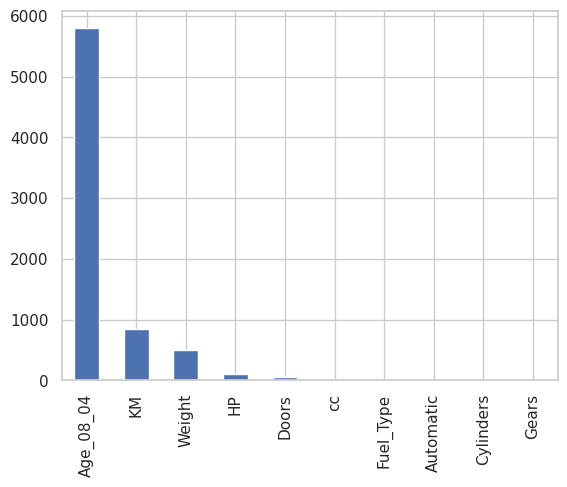

In [ ]:
pd.Series(f_reg[0],index=features.columns).sort_values(ascending=False).plot(kind="bar") #f_regression is used for feature selections

In [ ]:
features.drop(columns=["Gears","Cylinders","Automatic"],inplace=True) # Here we dropping gears,cylinders,automatic columns bcuz they give less
                                                                      # correlation and contribution for a problem

In [ ]:
from sklearn.model_selection import train_test_split

2. Split the dataset into training and testing sets

In [ ]:
# Splitting data into 2 parts
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=2)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1148, 7)
(287, 7)
(1148,)
(287,)


3. Build a multiple linear regression model using the training dataset

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
scaler.fit_transform(x_train,y_train)

array([[-0.1486306 , -0.11630664,  0.361003  , ...,  0.23929033,
        -0.0329966 , -0.89337222],
       [-0.52199587, -1.05370035,  0.361003  , ..., -0.93221078,
         1.01922827, -0.2415741 ],
       [ 0.49142415,  0.67209319,  0.361003  , ..., -1.51796134,
        -1.08522147, -1.41481071],
       ...,
       [-0.0952927 , -0.25593487,  0.361003  , ...,  0.23929033,
        -0.0329966 , -0.89337222],
       [ 0.01138309, -0.54187293,  0.361003  , ...,  0.23929033,
        -1.08522147, -0.37193372],
       [ 0.75811362,  0.6360297 ,  0.361003  , ...,  0.23929033,
        -1.08522147, -0.37193372]])

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score,mean_absolute_error

In [ ]:
lin_models=LinearRegression()

In [ ]:
lin_models.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=lin_models.predict(x_test)
y_pred

array([11061.02595991,  8932.99487547,  7329.12170841,  7572.58169002,
       12602.35870502, 17143.46325378,  8567.33702681, 12803.14880193,
       10925.36176308, 10223.1480931 ,  8324.34549016,  6643.81704971,
        7555.93789614,  7557.11871127,  9212.14128566,  8215.01824636,
       10467.70619065,  9390.48543709,  8924.66722823,  7220.54892458,
       16309.11158286, 11135.44505816,  9823.4693399 ,  9890.86539595,
       10603.72706126, 10164.53158119, 16196.67741847, 10327.43973166,
       12204.96876656,  9276.45128233,  9050.7339005 , 11248.02185543,
        7548.5493963 ,  7913.53491691, 10830.13767393,  8911.57654555,
       12126.45746178, 12438.9811269 , 12351.74022885,  9322.83861906,
        9113.8642429 , 16017.51506572, 13752.88489096,  9676.95485571,
       11425.57777128,  9692.59712628, 10769.5462734 ,  6639.19639443,
       13650.01369635,  8104.8378948 , 10105.49879087, 10303.06734321,
       15561.72228358, 16520.1124582 , 13573.2210523 ,  9721.74576115,
      

In [ ]:
mean_squared_error(y_test,y_pred)

1109986.832903894

In [ ]:
r2_score(y_test,y_pred)

0.8559629414024048

In [ ]:
mean_absolute_error(y_test,y_pred)

815.7447018888447

<Axes: >

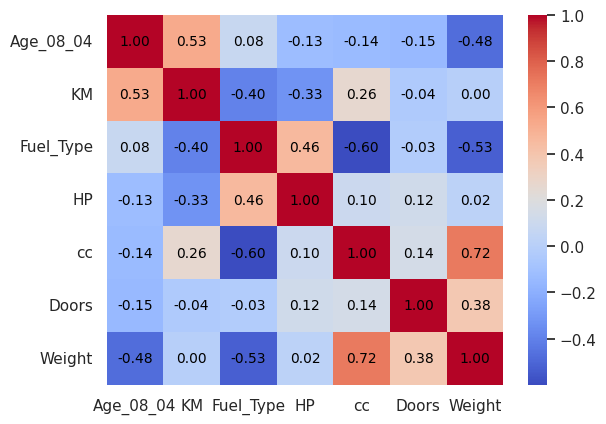

In [ ]:
corrr=features.corr()
sns.heatmap(corrr,annot=True,cmap='coolwarm',
    annot_kws={"size": 10, "color": "black"},
    fmt=".2f")

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
vif_data = pd.DataFrame()
vif_data['Feature'] = X_scaled.columns
vif_data['VIF'] = [variance_inflation_factor(X_scaled.values, i)
                   for i in range(X_scaled.shape[1])]

print(vif_data.sort_values(by='VIF', ascending=False))

     Feature       VIF
6     Weight  3.830834
4         cc  3.413709
2  Fuel_Type  2.927166
0  Age_08_04  2.131126
1         KM  2.004456
3         HP  1.856278
5      Doors  1.296663


VIF (Variance Inflation Factor) Summary

VIF shows how much a predictor is affected by multicollinearity — when predictors are too similar to each other.

All VIF values are below 5, so there’s no serious multicollinearity.

We can keep all predictors in the model safely.

A VIF above 10 would mean a strong multicollinearity problem, and we’d need to remove or combine features.

Model Assumptions

Linearity: The predictors have a roughly linear relationship with the target.

No perfect multicollinearity: Confirmed by low VIF values.

Homoscedasticity: Residuals have constant variance.

Normality of residuals: Residuals are approximately normal.

In [ ]:
import pandas as pd
df_dummies = pd.get_dummies(features, columns=['Age_08_04','KM','Weight','cc','HP','Fuel_Type'], drop_first=True, dtype=int)
print(df_dummies)

      Doors  Age_08_04_6.0  Age_08_04_7.0  Age_08_04_8.0  Age_08_04_9.0  \
0         3              0              0              0              0   
1         3              0              0              0              0   
2         3              0              0              0              0   
3         3              0              0              0              0   
4         3              0              0              0              0   
...     ...            ...            ...            ...            ...   
1430      3              0              0              0              0   
1431      3              0              0              0              0   
1432      3              0              0              0              0   
1433      3              0              0              0              0   
1434      5              0              0              0              0   

      Age_08_04_10.0  Age_08_04_11.0  Age_08_04_12.0  Age_08_04_13.0  \
0                  0       

In [ ]:
y_model=df[['Price']]

In [ ]:
x_model1=features[['Weight']]

In [ ]:
# Here we are building our first multicoliner regression model
x_model1=features[['Weight','cc','Fuel_Type','HP']]
model1=LinearRegression()
model1.fit(x_model1,y_model)
y_pred=model1.predict(x_model1)
print(y_pred)
print(mean_squared_error(y_model,y_pred),"\n  \n")
print(mean_absolute_error(y_model,y_pred),"\n  \n")
print(r2_score(y_model,y_pred),"\n  \n")

[[12258.00235521]
 [12258.00235521]
 [12258.00235521]
 ...
 [ 8183.9421303 ]
 [ 8183.9421303 ]
 [13962.8681186 ]]
4811680.506652599 
  

1736.7008291214574 
  

0.45691570494467804 
  



In [ ]:
# Here we are building our second model
x_model2=features[['Weight','cc','Fuel_Type','HP','KM']]
model2=LinearRegression()
model2.fit(x_model2,y_model)
y_pred=model2.predict(x_model2)
print(y_pred)
print(mean_squared_error(y_model,y_pred),"\n  \n")
print(mean_absolute_error(y_model,y_pred),"\n  \n")
print(r2_score(y_model,y_pred),"\n  \n")

[[14299.06023013]
 [13132.94436147]
 [14536.09391697]
 ...
 [10675.9521758 ]
 [10680.44570541]
 [15921.81967858]]
3109324.3305274034 
  

1367.5602796623252 
  

0.6490570789543999 
  



In [ ]:
# here we are building our third model using all features with strong correlations
x_model3=features[['Weight','cc','Fuel_Type','HP','KM','Age_08_04']]
model3=LinearRegression()
model3.fit(x_model3,y_model)
y_pred=model3.predict(x_model3)
print(y_pred)
print("mean_squared errors:\n",mean_squared_error(y_model,y_pred),"\n  \n")
print("mean_absolute errors:\n",mean_absolute_error(y_model,y_pred),"\n  \n")
print("r2_scores:\n",r2_score(y_model,y_pred),"\n  \n")

[[15056.312033  ]
 [14669.549561  ]
 [15026.57822888]
 ...
 [ 8625.99912774]
 [ 8735.83960548]
 [10526.12246619]]
mean_squared errors:
 1198861.4737654354 
  

mean_absolute errors:
 833.653033978161 
  

r2_scores:
 0.864687017883107 
  



In [ ]:
# Applying Lasso and Ridge on models

In [ ]:
from sklearn.linear_model import Lasso,Ridge

In [ ]:
lasso=Lasso(alpha=0.1)

In [ ]:
lasso.fit(x_train,y_train)

Lasso(alpha=0.1)

In [ ]:
y_pred=lasso.predict(x_test)

In [ ]:
y_pred

array([11061.23560166,  8933.08155109,  7328.94881161,  7572.80708457,
       12602.44880094, 17144.61303309,  8567.46013546, 12803.23667879,
       10925.50338107, 10223.22290812,  8324.40244787,  6643.68751841,
        7555.77875892,  7557.14173588,  9211.85206093,  8215.36344608,
       10467.69450812,  9390.4479288 ,  8924.35433813,  7220.51943518,
       16308.70719225, 11135.24774555,  9823.43004714,  9890.34164873,
       10603.54477397, 10164.53873806, 16196.51844937, 10327.56953882,
       12204.89099368,  9276.27545603,  9050.59520034, 11248.11715652,
        7548.21579367,  7913.57170475, 10830.21697638,  8911.10423851,
       12126.67564459, 12439.16861928, 12352.05942685,  9322.84958365,
        9113.9426818 , 16017.02407129, 13753.07586406,  9677.09331447,
       11425.88496997,  9692.52220545, 10769.57798958,  6638.68100827,
       13650.27355166,  8104.79239007, 10105.62954997, 10303.09724192,
       15561.61010305, 16519.63768433, 13573.12676963,  9721.77204903,
      

In [ ]:
mean_squared_error(y_test,y_pred)

1110062.4095192095

In [ ]:
mean_absolute_error(y_test,y_pred)

815.7794469139127

In [ ]:
r2_score(y_test,y_pred)

0.8559531342289807

In [ ]:
lasso.coef_

array([-1.07800159e+02, -1.53126496e-02,  5.09739008e+02,  1.79275084e+01,
       -1.63869934e+00, -8.60825193e+01,  2.32942666e+01])

In [ ]:
Ridge=Ridge(alpha=0.1)

In [ ]:
Ridge.fit(x_train,y_train)

Ridge(alpha=0.1)

In [ ]:
y_preds=Ridge.predict(x_test)

In [ ]:
y_preds

array([11061.0643726 ,  8933.05042225,  7329.02167991,  7572.65380783,
       12602.35290864, 17143.95105976,  8567.36549553, 12803.13769635,
       10925.37322302, 10223.13456528,  8324.34803732,  6643.72789705,
        7555.84129523,  7557.15228934,  9212.08027404,  8215.10388155,
       10467.71329577,  9390.48994323,  8924.53573139,  7220.51335779,
       16309.01829661, 11135.34170034,  9823.41494343,  9890.70979852,
       10603.68489414, 10164.55979299, 16196.61564689, 10327.51801879,
       12204.9565933 ,  9276.41905987,  9050.71327305, 11248.0877903 ,
        7548.44815616,  7913.51213712, 10830.12826292,  8911.43405181,
       12126.50267116, 12439.02146531, 12351.83366334,  9322.80570011,
        9113.85895336, 16017.43191166, 13752.9126975 ,  9676.97219326,
       11425.66053786,  9692.52876878, 10769.51791817,  6639.03083672,
       13650.07166741,  8104.84253806, 10105.51192199, 10303.10558878,
       15561.66489305, 16519.92620147, 13573.21037677,  9721.71795473,
      

In [ ]:
mean_squared_error(y_test,y_preds)

1110011.691136816

In [ ]:
mean_absolute_error(y_test,y_preds)

815.7562697956704

In [ ]:
r2_score(y_test,y_preds)

0.8559597156823819

In [ ]:
Ridge.coef_

array([-1.07800922e+02, -1.53101152e-02,  5.10797865e+02,  1.79167751e+01,
       -1.63802976e+00, -8.62467185e+01,  2.32992668e+01])

In [ ]:
r2_score(y_test,y_preds)

0.8559597156823819

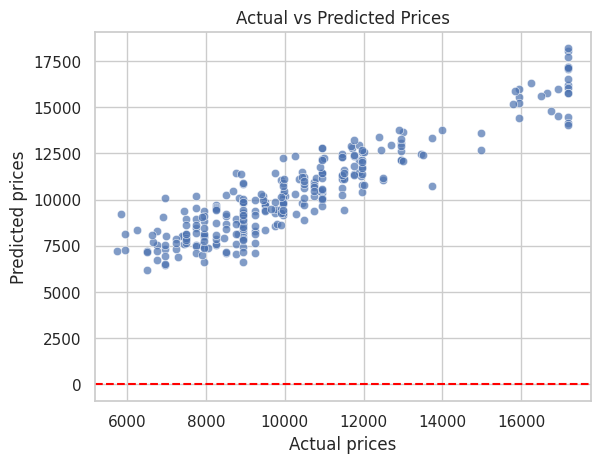

In [ ]:
sns.scatterplot(x=y_test.values.flatten(), y=y_preds.flatten(), alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual vs Predicted Prices")
plt.show()

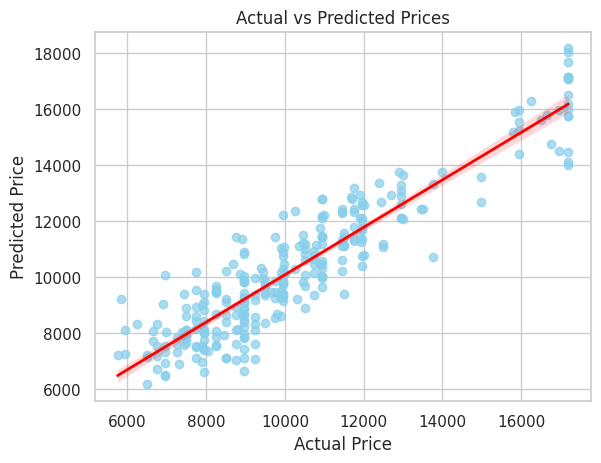

In [ ]:
sns.regplot(
    x=y_test,
    y=y_pred,
    scatter_kws={'color': 'skyblue', 'alpha': 0.7},
    line_kws={'color': 'red', 'linewidth': 2}
)

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Prices")
plt.show()
